# Torre Medida (ME)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
torre_me = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreME.txt'

 ## Load file

In [3]:
parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
df_torre_me = pd.read_csv(torre_me, skiprows=12,  
                          delim_whitespace=True, 
                          header=None, 
                          names=['day', 'time', 'direccion_viento', 'v_h10', 'v_h20', 'v_h40'],
                          parse_dates=[['day', 'time']], 
                          date_parser=parse,
                          index_col=0)

In [4]:
df_torre_me.head()

,direccion_viento,v_h10,v_h20,v_h40
day_time,,,,
2004-07-01 00:00:00,55.0,9.3,9.9,9.6
2004-07-01 00:01:00,54.0,8.7,9.4,9.6
2004-07-01 00:02:00,54.0,8.7,9.3,9.8
2004-07-01 00:03:00,53.0,8.8,9.3,9.6
2004-07-01 00:04:00,52.0,9.9,10.4,10.2


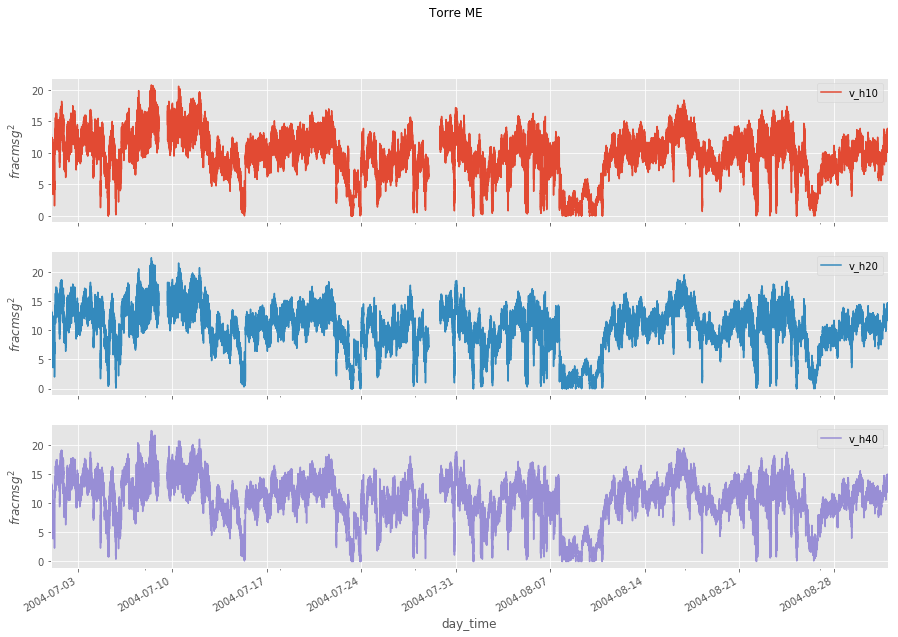

In [11]:
axes = df_torre_me[['v_h10', 'v_h20', 'v_h40']].plot(subplots=True, 
                                                     figsize=(15,10),
                                                     title='Torre ME')
axes[0].set_ylabel(r'$frac{m}{sg^{2}}$')
axes[1].set_ylabel(r'$frac{m}{sg^{2}}$')
axes[2].set_ylabel(r'$frac{m}{sg^{2}}$');

In [14]:
df_wind = df_torre_me[['v_h10', 'v_h20', 'v_h40']]

In [80]:
print('**** Registro minutal')
print('Número total de registros: {0}'.format(df_torre_me.shape[0]))
print('Número total de series: {0}'.format(df_torre_me.shape[1]-1))

**** Registro minutal
Número total de registros: 87123
Número total de series: 3


In [81]:
print('**** Periodo de muestreo')
print('Inicio: {0}'.format(df_torre_me.index.min()))
print('Inicio: {0}'.format(df_torre_me.index.max()))

**** Periodo de muestreo
Inicio: 2004-07-01 00:00:00
Inicio: 2004-08-31 23:58:00


## Nan values

In [13]:
true_index = pd.date_range(df_torre_me.index.min(), df_torre_me.index.max(), freq='1min')
df_true = pd.DataFrame(index=true_index)
df_true.head()

""
2004-07-01 00:00:00
2004-07-01 00:01:00
2004-07-01 00:02:00
2004-07-01 00:03:00
2004-07-01 00:04:00


In [15]:
df_join = pd.concat([df_true, df_wind], axis=1, join='outer')

In [16]:
df_nan = df_join[df_join.isnull().any(axis=1)]
df_nan

,v_h10,v_h20,v_h40
2004-07-09 00:01:00,NaN,NaN,NaN
2004-07-09 00:02:00,NaN,NaN,NaN
2004-07-09 00:03:00,NaN,NaN,NaN
2004-07-09 00:04:00,NaN,NaN,NaN
2004-07-09 00:05:00,NaN,NaN,NaN
2004-07-09 00:06:00,NaN,NaN,NaN
2004-07-09 00:07:00,NaN,NaN,NaN
2004-07-09 00:08:00,NaN,NaN,NaN
2004-07-09 00:09:00,NaN,NaN,NaN
2004-07-09 00:10:00,NaN,NaN,NaN


In [17]:
print('Número de medidas nulas: {0}'.format(df_true.shape[0] - df_wind.shape[0]))

Número de medidas nulas: 2156


## Definition of wind classes for wind measured at 50-m (164-ft) height

|Wind Class | Wind Speed (m/seg) |
|-----------|--------------------|
|Marginal | 5.6–6.4
|Fair | 6.4–7.0
|Good | 7.0–7.5
|Excellent | 7.5–8.0
|Outstanding | 8.0–8.8
|Superb | 8.8–11.1 |

In [82]:
df_v10 = df_torre_me[['v_h10']]
df_v20 = df_torre_me[['v_h20']]
df_v40 = df_torre_me[['v_h40']]

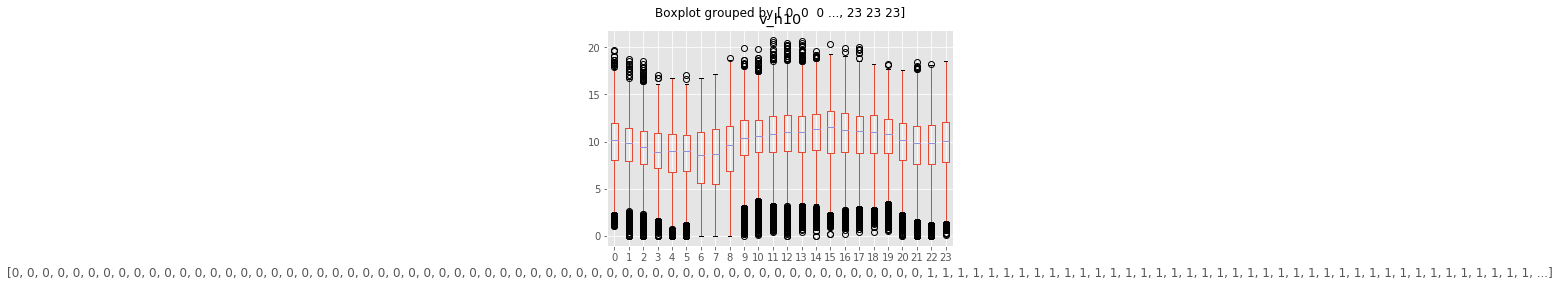

In [87]:
# Falta box plot horarios
df_v10.boxplot(column=['v_h10'], by=df_v10.index.hour)

In [90]:
df_horario_v40.index.hour

array([ 0,  1,  2, ..., 21, 22, 23], dtype=int32)

## Velocidad viento a 40 mtos

In [54]:
df_v40.head(5)

,v_h40
day_time,
2004-07-01 00:00:00,9.6
2004-07-01 00:01:00,9.6
2004-07-01 00:02:00,9.8
2004-07-01 00:03:00,9.6
2004-07-01 00:04:00,10.2


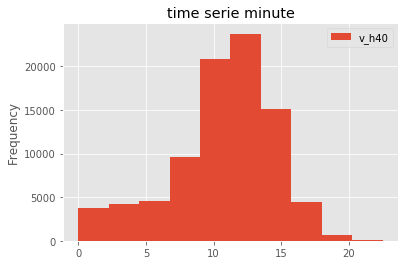

In [55]:
df_v40.plot(kind='hist', title='time serie minute')

In [56]:
# agrupamos por horas (se le pueden aplicar diferentes oparaciones)
df_horario_v40 = df_v40.resample('H').max()
df_horario_v40.head(5)

,v_h40
day_time,
2004-07-01 00:00:00,13.6
2004-07-01 01:00:00,13.5
2004-07-01 02:00:00,12.3
2004-07-01 03:00:00,12.3
2004-07-01 04:00:00,8.9


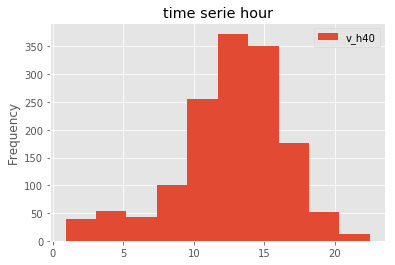

In [57]:
df_horario_v40.plot(kind='hist', title='time serie hour')

In [58]:
df_15mtos_v40 = df_v40.resample('15Min').max()
df_15mtos_v40.head(5)

,v_h40
day_time,
2004-07-01 00:00:00,12.5
2004-07-01 00:15:00,13.6
2004-07-01 00:30:00,13.3
2004-07-01 00:45:00,12.3
2004-07-01 01:00:00,13.1


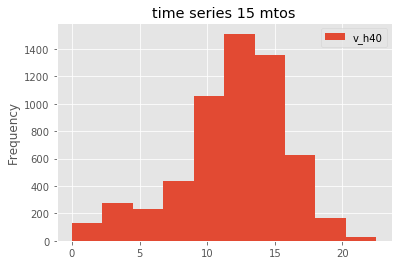

In [59]:
df_15mtos_v40.plot(kind='hist', title='time series 15 mtos')

## Velocidad del viento en las 3 alturas

In [62]:
df_v_mtos = pd.concat([df_v10, df_v20, df_v40], axis=1)
df_v_mtos.head()

,v_h10,v_h20,v_h40
day_time,,,
2004-07-01 00:00:00,9.3,9.9,9.6
2004-07-01 00:01:00,8.7,9.4,9.6
2004-07-01 00:02:00,8.7,9.3,9.8
2004-07-01 00:03:00,8.8,9.3,9.6
2004-07-01 00:04:00,9.9,10.4,10.2


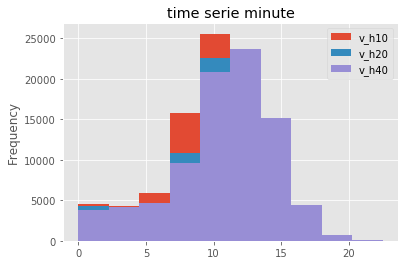

In [63]:
df_v_mtos.plot(kind='hist', title='time serie minute')

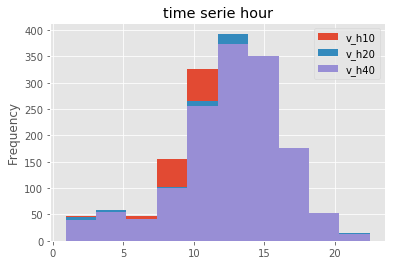

In [68]:
pd.concat([df_v10.resample('H').max(),
           df_v20.resample('H').max(),
           df_v40.resample('H').max()], axis=1).plot(kind='hist',
                                                     title='time serie hour')

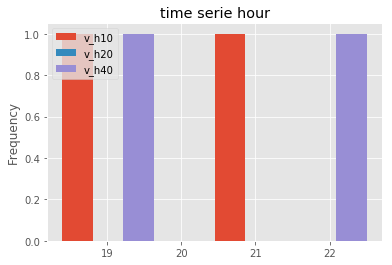